In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
import pandas as pd
from cycler import cycler

In [38]:
with open('cars_data.json', 'r') as f:
    cars = json.load(f)
df = pd.DataFrame(cars)

KM_PER_LITER_PER_MILES_PER_GALLON = 0.425144

df['kpl'] = df['Miles_per_Gallon'] * KM_PER_LITER_PER_MILES_PER_GALLON
df = df[~np.isnan(df['kpl']) & ~np.isnan(df['Horsepower'])]

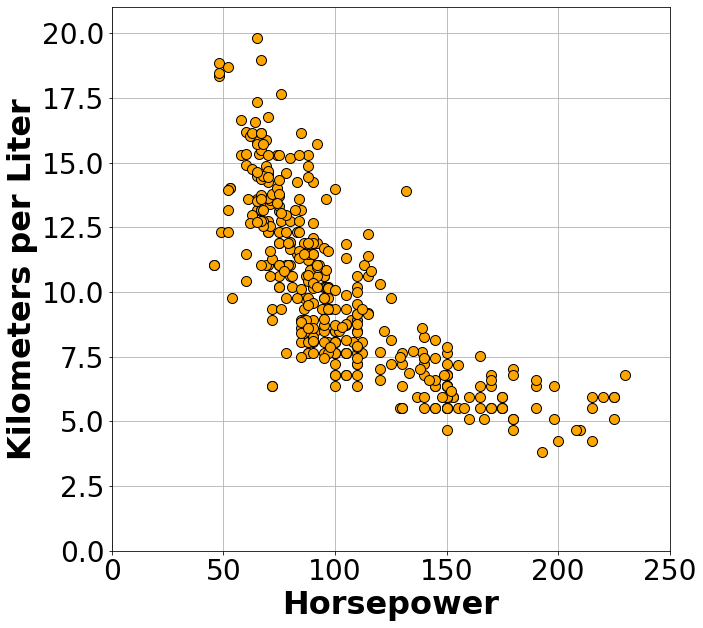

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
plt.savefig('../tmp/cars_data.png', bbox_inches='tight')

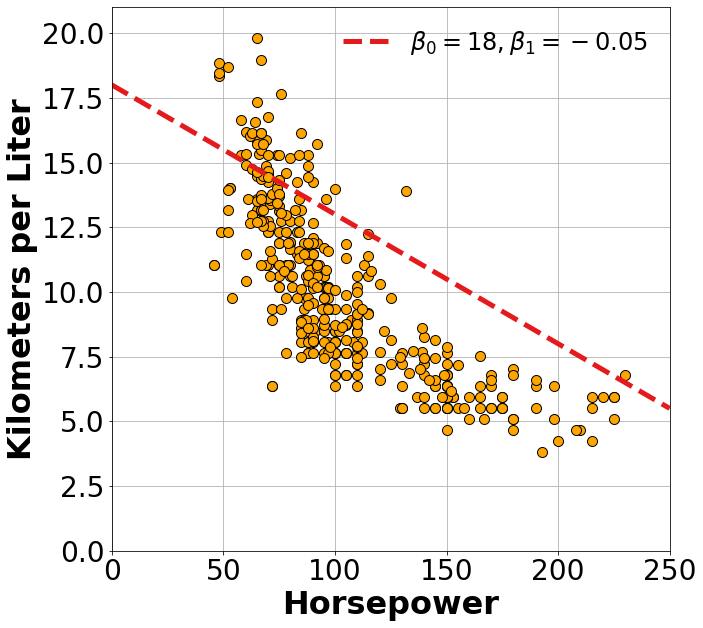

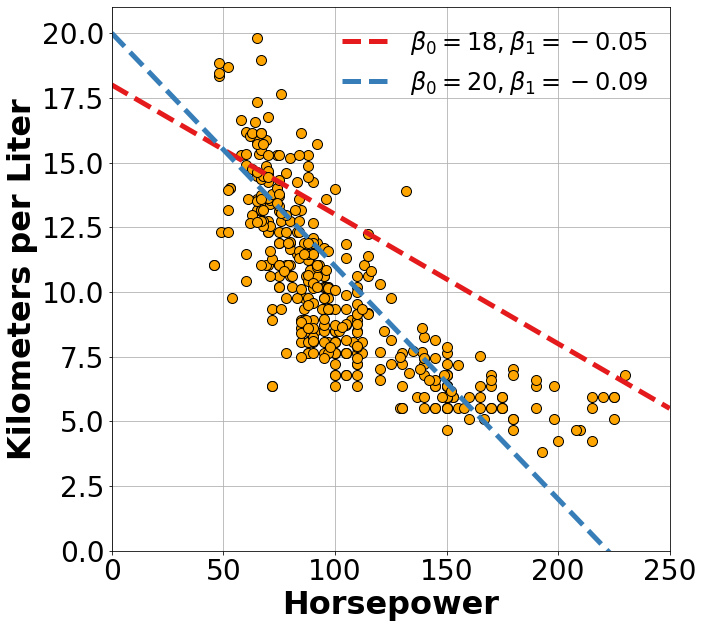

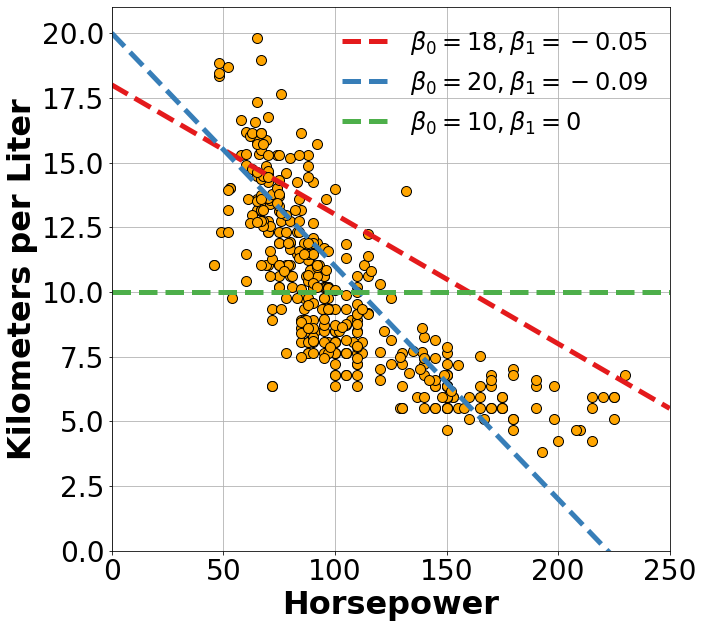

In [40]:
hp = np.linspace(0, 250)
lines = [
    18 - 0.05*hp,
    20 - 0.09*hp,
    10 + 0.0000*hp
]
labels = [
    (r'$\beta_0 = 18, \beta_1=-0.05$'),
    (r'$\beta_0 = 20, \beta_1=-0.09$'),
    (r'$\beta_0 = 10, \beta_1=0$'),
]
colors = [
    ''
]


plt.rcParams['axes.prop_cycle'] = cycler(color=plt.cm.Set1.colors)
for n_lines in [1,2,3]:
    f, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')
    for line, label in zip(lines[:n_lines], labels[:n_lines]):
        ax.plot(hp, line, linewidth=5, linestyle='--', label=label)
    ax.legend(fontsize=24, frameon=False)
    ax.tick_params(axis='x', labelsize=28)
    ax.tick_params(axis='y', labelsize=28)
    ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
    ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
    ax.grid('both')
    ax.set_ylim([0, 21])
    ax.set_xlim([0, 250])
    plt.savefig('../tmp/cars_data_lines%d.png' % n_lines, bbox_inches='tight')

4.38036292752973
(17.171717171717173, -0.07070707070707072)


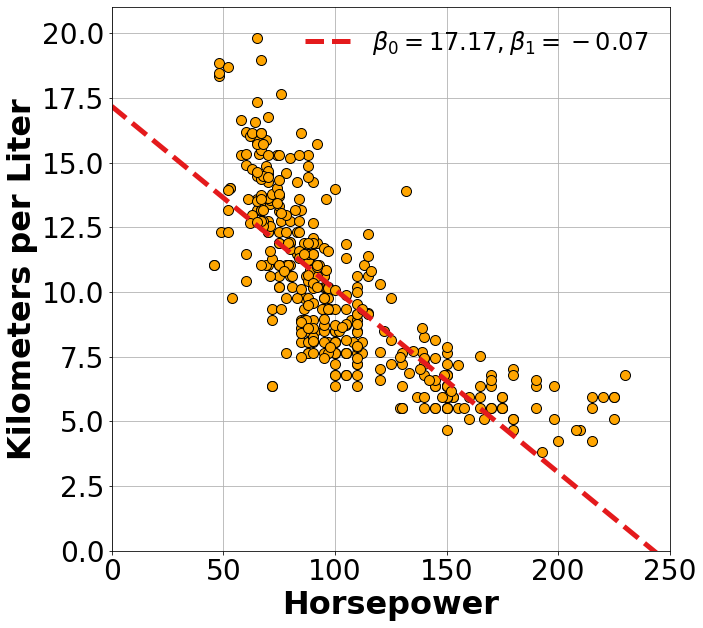

In [45]:
hp = np.array(df['Horsepower'])
kpl = np.array(df['kpl'])
beta0s = np.linspace(0, 50, 100)
beta1s = -np.linspace(0, 1, 100)

best_betas = None
best_loss = np.float("inf")
for b0 in beta0s:
    for b1 in beta1s:
        line = b0 + b1 * hp
        mse = np.mean(np.square(line - kpl))
        if mse < best_loss:
            best_loss = mse
            best_betas = (b0, b1)


b0, b1 = best_betas
print(best_loss)
print(best_betas)

f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.plot(df['Horsepower'], df['kpl'], marker='o', linestyle='', markersize=10, color='orange', markeredgecolor='black')

hp = np.linspace(0, 250, 1000)
ax.plot(hp, b0+b1*hp, linewidth=5, linestyle='--', label=r'$\beta_0 = %0.2f, \beta_1=%0.2f$' % (b0,b1))
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)
ax.set_ylabel('Kilometers per Liter', fontsize=32, fontweight='bold')
ax.set_xlabel('Horsepower', fontsize=32, fontweight='bold')
ax.grid('both')
ax.set_ylim([0, 21])
ax.set_xlim([0, 250])
ax.legend(fontsize=24, frameon=False)
plt.savefig('../tmp/best_fit.png', bbox_inches='tight')